In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

In [2]:
drink = pd.read_csv('data10/drinks.csv')
drink

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [3]:
drink.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [4]:
drink.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


### 각 컬럼간 상관관계를 확인한다.

In [5]:
# beer_servings와 wine_servings 두 특성간의 상관계수를 계산한다
# pearson은 상관계수를 계산하는 함수
corr = drink[['beer_servings','wine_servings']].corr(method = 'pearson')

In [6]:
corr

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


In [7]:
# 여러 피처의 상관관계 분석
cols = ['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']
corr  = drink[cols].corr(method = 'pearson')
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


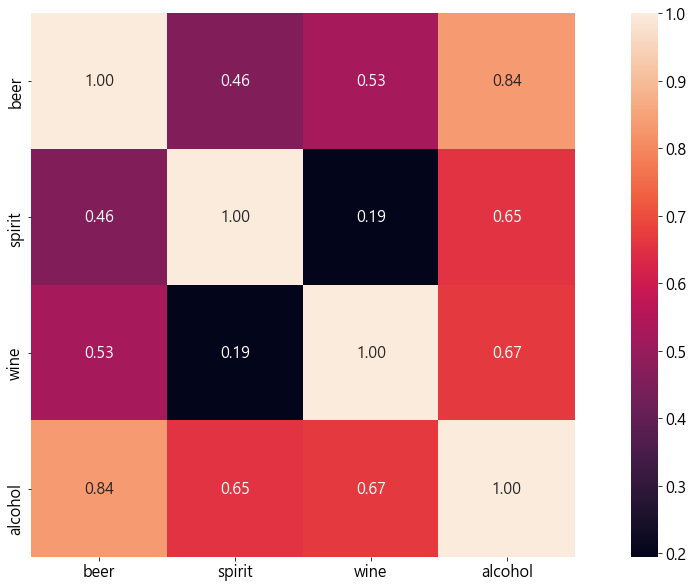

<Figure size 288x288 with 0 Axes>

In [8]:
# Heat map
cols_view = ['beer','spirit','wine','alcohol']
hm = sns.heatmap(corr.values, cbar = True, annot = True, square = True,
                fmt = '.2f',yticklabels = cols_view,xticklabels = cols_view)
plt.figure(figsize = (4,4))
plt.show()

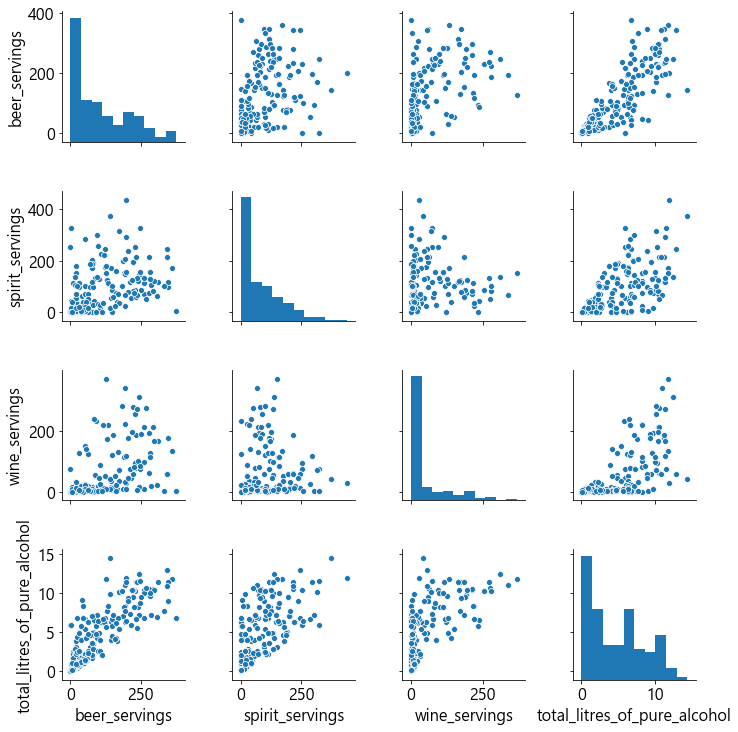

In [9]:
# 시각화 라이브러리를 이용한 피처간의 scatter
sns.pairplot(drink[cols])
plt.show()

### 결측치 처리

In [10]:
drink.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [11]:
# 대륙이 결측치 인 곳은 기타 대륙(OT)로 채워준다
# 사실 결측치라는 NA(북미)라는 글자를 결측치로 취급해버렷다
drink['continent'] = drink['continent'].fillna('NA')

In [12]:
drink['continent'].isna().sum()

0

In [13]:
drink['continent'].value_counts()

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

### 대륙별 비율을 확인한다

In [14]:
# 대륙이름들
labels = drink['continent'].value_counts().index.tolist()
labels

['AF', 'EU', 'AS', 'NA', 'OC', 'SA']

In [15]:
# 대륙별 국가수
fraces = drink['continent'].value_counts().values.tolist()
fraces

[53, 45, 44, 23, 16, 12]

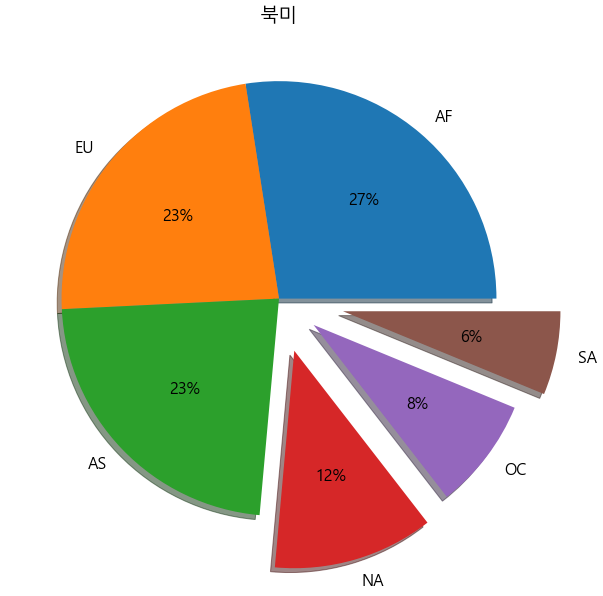

In [21]:
# pie차트
explode = 0,0,0,0.25,0.2,0.3
plt.pie(fraces,autopct ='%.0f%%' ,labels = labels,explode = explode,shadow = True)
plt.title('북미')
plt.show()

#### 대륙별 spirit_servings의 평균,최소,최대,합계를 계산한다

In [23]:
result = drink.groupby('continent')['spirit_servings'].agg(['mean','min','max','sum'])

In [25]:
result

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
NA,165.739130,68,438,3812
OC,58.437500,0,254,935
SA,114.750000,25,302,1377


#### 전체 평균보다 많은 알콜을 섭취하는 대륙을 구한다

In [32]:
total_mean = drink['total_litres_of_pure_alcohol'].mean()

In [30]:
# 대륙별 알콜섭취 평균
a1 = drink.groupby('continent')['total_litres_of_pure_alcohol']
continent_mean = a1.mean()
continent_mean

continent
AF    3.007547
AS    2.170455
EU    8.617778
NA    5.995652
OC    3.381250
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [33]:
# 전체 평균보다 높은 대륙만 가져온다
a1 = continent_mean>=total_mean
continent_over_mean  = continent_mean[a1]
continent_over_mean

continent
EU    8.617778
NA    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

### 평균beer_servings가 가장 높은 대륙을 구한다

In [43]:
a1 = drink.groupby('continent')
beer_continent = a1['beer_servings'].mean()
beer_continent
# 값이 가장 큰 로우의 인덱스를 가져온다
beer_continent = beer_continent.idxmax()
beer_continent

'EU'

### 위에서 구한 대륙별 spirit_servings의 평균 최소, 최대 ,합계의 시각화

In [44]:
# 대륙의수
n_groups = len(result)
n_groups

6

In [46]:
# 각 결과를 따로 추출한다
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()

print(means)
print(mins)
print(maxs)
print(sums)

[16.339622641509433, 60.84090909090909, 132.55555555555554, 165.7391304347826, 58.4375, 114.75]
[0, 0, 0, 68, 0, 25]
[152, 326, 373, 438, 254, 302]
[866, 2677, 5965, 3812, 935, 1377]


In [47]:
# 그래프 인덱스 번호
index = np.arange(n_groups)
index

array([0, 1, 2, 3, 4, 5])

In [48]:
# 그래프 바의 가로길이
bar_width = 0.1


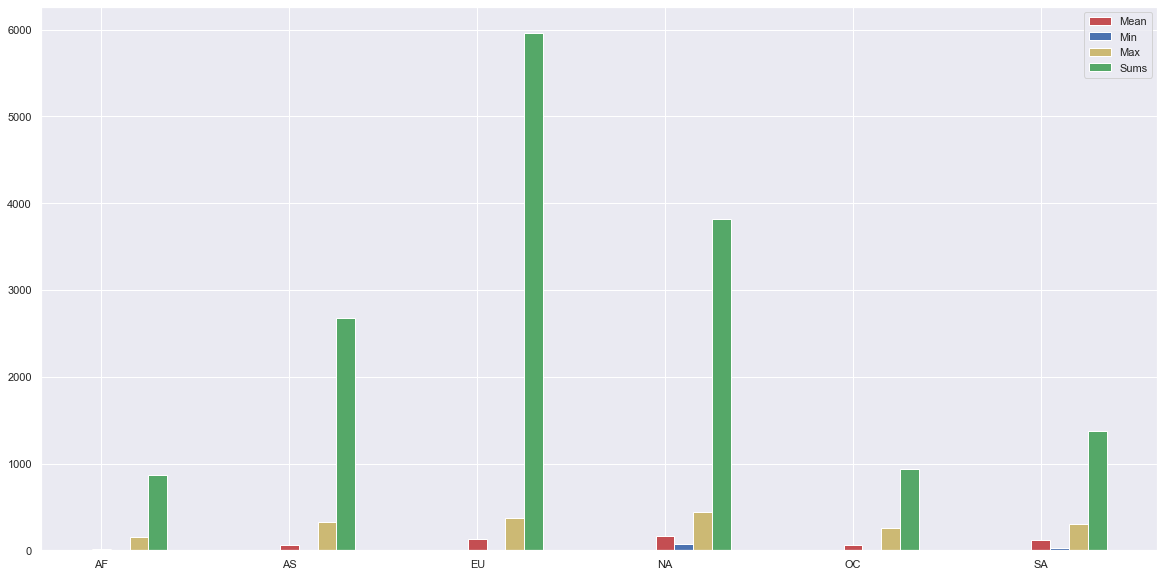

In [56]:
sns.set()
plt.bar(index,means,bar_width, color = 'r',label = 'Mean')
plt.bar(index+bar_width,mins,bar_width,color = 'b',label = 'Min')
plt.bar(index+2*(bar_width),maxs,bar_width,color = 'y',label = 'Max')
plt.bar(index+3*(bar_width),sums,bar_width,color = 'g',label = 'Sums')
plt.legend()
plt.xticks(index,result.index.tolist())
plt.show()

### 대륙별 total_litres_of_pure_alcohol 시각화

In [77]:
# 대륙별 평균에서 대륙이름을 가져온다
continents = continent_mean.index.tolist()
continents.append('mean')

In [68]:
# x축 위치
x_pos = np.arange(len(continents)+1)
x_pos

array([0, 1, 2, 3, 4, 5, 6])

In [61]:
# 알콜값
alcohol = continent_mean.tolist()
alcohol.append(total_mean)
alcohol

[3.00754716981132,
 2.1704545454545454,
 8.617777777777777,
 5.995652173913044,
 3.3812500000000005,
 6.308333333333334,
 4.717098445595855]

In [66]:
x_pos

array([0, 1, 2, 3, 4, 5])

In [67]:
alcohol

[3.00754716981132,
 2.1704545454545454,
 8.617777777777777,
 5.995652173913044,
 3.3812500000000005,
 6.308333333333334,
 4.717098445595855]

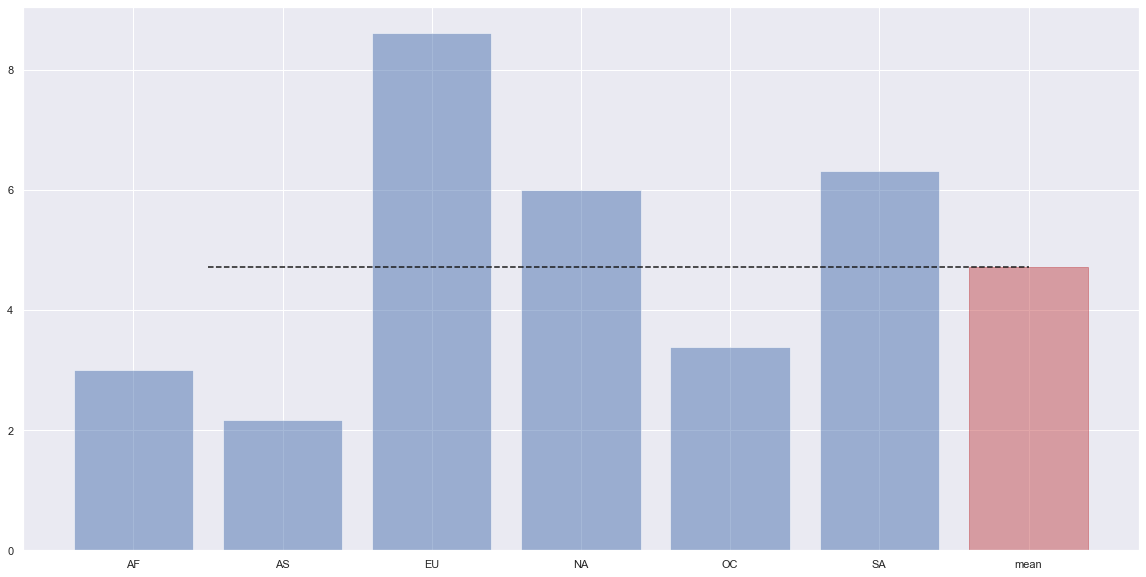

In [82]:
bar_list = plt.bar(x_pos, alcohol, align = 'center',alpha = 0.5)
# 마지막(전체평균)은 붉은 색으로 변경한다
bar_list[-1].set_color('r')
# x축 이름을 대륙의 이름으로 설정한다
plt.xticks(x_pos,continents)
plt.plot([0.5,6],[total_mean,total_mean],'k--')
# 처음부터
plt.show()

### 대륙별 beer_servings 를 시각화 한다

In [93]:
# 각 대륙별 맥주 소비량 평균을 구한다
beer_group = drink.groupby('continent')['beer_servings'].mean()
beer_group

continent
AF     61.471698
AS     37.045455
EU    193.777778
NA    145.434783
OC     89.687500
SA    175.083333
Name: beer_servings, dtype: float64

In [95]:
# 맥주판매량이 가장 높은 국가이름
beer_continent

'EU'

In [96]:
# 각대륙의 이름을 가져온다.
continents = beer_group.index.tolist()
continents

['AF', 'AS', 'EU', 'NA', 'OC', 'SA']

In [98]:
x_pos = np.arange(len(continents))
x_pos

array([0, 1, 2, 3, 4, 5])

In [97]:
# 알코올 량도 구한다
alcohol = beer_group.tolist()
alcohol

[61.471698113207545,
 37.04545454545455,
 193.77777777777777,
 145.43478260869566,
 89.6875,
 175.08333333333334]

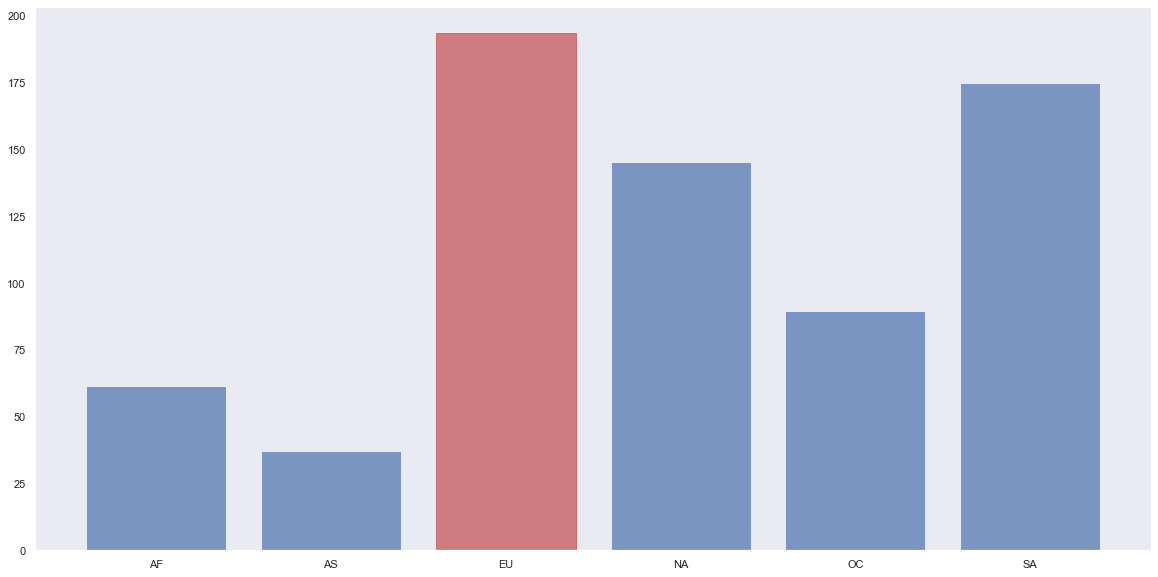

In [108]:
bar_list = plt.bar(x_pos,alcohol,align = 'center',alpha = 0.7)
# 가장 많은 국가를 붉은 색으로 표시한다
bar_list[continents.index(beer_continent)].set_color('r')
# x축에 국가를 표시한다
plt.xticks(x_pos, continents)
plt.grid()
plt.show()

In [107]:
continents.index(beer_continent)

2

### 과연 한국인은 얼마나 독하게 술을 먹을까

In [109]:
# 전체 소비량을 구한다
total_servings = drink['beer_servings'] + drink['wine_servings'] + drink['spirit_servings']

In [110]:
total_servings

0        0
1      275
2       39
3      695
4      319
      ... 
188    436
189    114
190      6
191     55
192     86
Length: 193, dtype: int64

In [111]:
drink['total_servings'] = total_servings

In [112]:
drink

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319
...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436
189,Vietnam,111,2,1,2.0,AS,114
190,Yemen,6,0,0,0.1,AS,6
191,Zambia,32,19,4,2.5,AF,55


In [115]:
# 술소비량 대비 알콜 비율특성을 생성한다
a1 = drink['total_litres_of_pure_alcohol']/drink['total_servings']
# 결측치를 0으로 채워준다
a1.fillna(0,inplace = True)
drink['alcohol_rate'] = a1
drink

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
0,Afghanistan,0,0,0,0.0,AS,0,0.000000
1,Albania,89,132,54,4.9,EU,275,0.017818
2,Algeria,25,0,14,0.7,AF,39,0.017949
3,Andorra,245,138,312,12.4,EU,695,0.017842
4,Angola,217,57,45,5.9,AF,319,0.018495
...,...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436,0.017661
189,Vietnam,111,2,1,2.0,AS,114,0.017544
190,Yemen,6,0,0,0.1,AS,6,0.016667
191,Zambia,32,19,4,2.5,AF,55,0.045455


In [116]:
# 국가와 알콜 비율을 추출한다
country_with_rank = drink[['country','alcohol_rate']]
country_with_rank

,country,alcohol_rate
0,Afghanistan,0.000000
1,Albania,0.017818
2,Algeria,0.017949
3,Andorra,0.017842
4,Angola,0.018495
...,...,...
188,Venezuela,0.017661
189,Vietnam,0.017544
190,Yemen,0.016667
191,Zambia,0.045455


In [125]:
country_with_rank.nlargest(5,'alcohol_rate')

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111


In [126]:
# alcohol_rate를 기준으로 내림차순으로 정렬
country_with_rank.sort_values('alcohol_rate',ascending=False, inplace = True)
country_with_rank

C:\Users\master11\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111
...,...,...
103,Maldives,0.000000
97,Libya,0.000000
79,Iran,0.000000
90,Kuwait,0.000000


In [127]:
# 국가별 순위 정보를 그래프로 그린다.
# 국가 목록을 가져온다
country_list = country_with_rank['country'].tolist()
country_list

['Gambia',
 'Sierra Leone',
 'Nigeria',
 'Uganda',
 'Rwanda',
 'Tanzania',
 'Burkina Faso',
 'Central African Republic',
 "Cote d'Ivoire",
 'Mali',
 'Sudan',
 'Malawi',
 'Burundi',
 'DR Congo',
 'South Korea',
 'Zimbabwe',
 'Swaziland',
 'Zambia',
 'Ghana',
 'Cameroon',
 'Laos',
 'Guinea-Bissau',
 'Ethiopia',
 'Eritrea',
 'Belarus',
 'Lesotho',
 'Japan',
 'Chad',
 'Togo',
 'Botswana',
 'Kenya',
 'Benin',
 'South Africa',
 'New Zealand',
 'Finland',
 'Lithuania',
 'Comoros',
 'Saudi Arabia',
 'Estonia',
 'Congo',
 'United Kingdom',
 'Ireland',
 'Australia',
 'Argentina',
 'Slovakia',
 'Latvia',
 'Mozambique',
 'Cabo Verde',
 'Angola',
 'Sri Lanka',
 'Portugal',
 'Ukraine',
 'France',
 'Guinea',
 'Egypt',
 'Nepal',
 'Norway',
 'St. Lucia',
 'Dominica',
 'Sweden',
 'Jamaica',
 'Spain',
 'Singapore',
 'Paraguay',
 'Azerbaijan',
 'Switzerland',
 'Bahamas',
 'Turkmenistan',
 'Armenia',
 'Vanuatu',
 'Qatar',
 'Haiti',
 'Cook Islands',
 'Montenegro',
 'Sao Tome & Principe',
 'Oman',
 'Algeria'

In [129]:
# x축으로 사용할 인덱스
x_pos = np.arange(len(country_list))
x_pos

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [130]:
# y축에 사용할 값들
rank = country_with_rank['alcohol_rate'].tolist()
rank

[0.26666666666666666,
 0.22333333333333333,
 0.18571428571428572,
 0.1537037037037037,
 0.1511111111111111,
 0.1325581395348837,
 0.11025641025641025,
 0.09,
 0.08888888888888889,
 0.08571428571428572,
 0.08095238095238096,
 0.075,
 0.0715909090909091,
 0.06388888888888888,
 0.0593939393939394,
 0.05465116279069768,
 0.05,
 0.045454545454545456,
 0.04090909090909091,
 0.038157894736842106,
 0.03351351351351351,
 0.03125,
 0.03043478260869565,
 0.027777777777777776,
 0.02585278276481149,
 0.025225225225225224,
 0.023728813559322035,
 0.023529411764705882,
 0.02280701754385965,
 0.022222222222222223,
 0.021951219512195124,
 0.021568627450980395,
 0.021465968586387434,
 0.020350109409190374,
 0.02028397565922921,
 0.02006220839813375,
 0.02,
 0.02,
 0.019916142557651992,
 0.019767441860465116,
 0.01925925925925926,
 0.01912751677852349,
 0.01908256880733945,
 0.018906605922551254,
 0.01884297520661157,
 0.018783542039355994,
 0.018571428571428572,
 0.018518518518518517,
 0.018495297805642

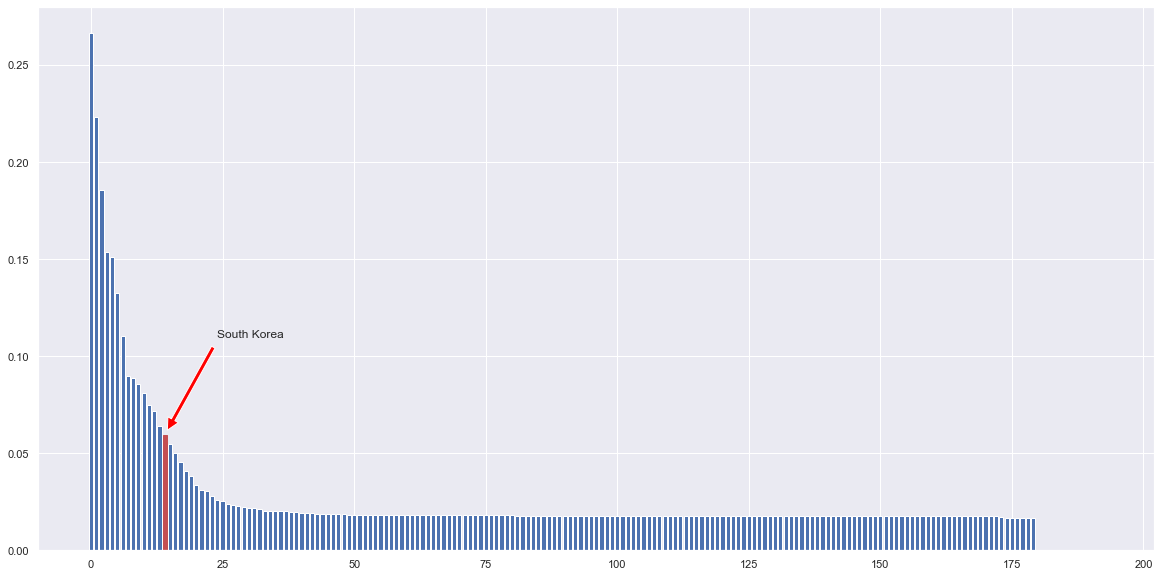

In [143]:
barlist = plt.bar(x_pos,rank)
# 한국은 빨간색으로 표시한다
barlist[country_list.index("South Korea")].set_color('r')
# 한국에 표시한다
# 한국의 막대 인덱스를 가져온다
korea_rank = country_list.index("South Korea")

# 한국알콜수치
a1 = country_with_rank[country_with_rank['country']=='South Korea']
korea_alc_rate = a1['alcohol_rate'].values[0]
plt.annotate('South Korea',xy = (korea_rank,korea_alc_rate),
             xytext = (korea_rank+10,korea_alc_rate+0.05),arrowprops = \
             dict(facecolor = 'red',shrink = 0.05))
plt.show()

In [137]:
a1 = country_with_rank[country_with_rank['country']=='South Korea']
a1
korea_alc_rate = a1['alcohol_rate'].values[0]
korea_alc_rate

0.0593939393939394